#### The libraries & modules which we are going to use in our study:

In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### First of all, we load our data as a csv file:

In [53]:
data = pd.read_csv("C:\\Users\\umash\\OneDrive\\Desktop\\mini project\\train.csv")

#### Explore the dataset

In [54]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Here is the attributes of our dataset:

#### id: ID
#### battery_power: Total energy a battery can store in one time measured in mAh
#### blue: Has bluetooth or not
#### clock_speed: speed at which microprocessor executes instructions
#### dual_sim: Has dual sim support or not
#### fc: Front Camera mega pixels
#### four_g: Has 4G or not
#### int_memory: Internal Memory in Gigabytes
#### m_dep: Mobile Depth in cm
#### mobile_wt: Weight of mobile phone
#### n_cores: Number of cores of processor
#### pc: Primary Camera mega pixels
#### px_height: Pixel Resolution Height
#### px_width: Pixel Resolution Width
#### ram: Random Access Memory in Megabytes
#### sc_h: Screen Height of mobile in cm
#### sc_w: Screen Width of mobile in cm
#### talk_time: longest time that a single battery charge will last when you are
#### three_g: Has 3G or not
#### touch_screen: Has touch screen or not
#### wifi: Has wifi or not
#### price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)


In [55]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### We have 2000 samples and 21 attributes.
#### The last attribute is a target attribute, which means that we have labeled data

In [56]:
data.shape

(2000, 21)

#### Data-type of each Attribute

In [57]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### We do not have any null values in our dataset. It will ease the preprocessing step

In [58]:
import pandas as pd
data = pd.read_csv("C:\\Users\\umash\\OneDrive\\Desktop\\mini project\\train.csv")
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Data description

In [59]:
import pandas as pd
data = pd.read_csv("C:\\Users\\umash\\OneDrive\\Desktop\\mini project\\train.csv")
data.describe()
#generate descriptive statistics of the data in a Pandas DataFrame or Series.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### We have four price ranges as target values and will do multi-class classification in our study. 

#### Let's see our dataset is balanced or imbalanced?


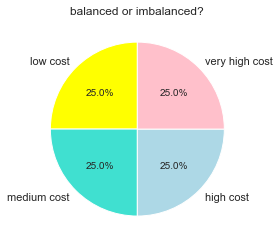

In [60]:
import matplotlib.pyplot as plt

labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#autopct=label the wedges with their numeric value in a pie chart,allows us to display the percent
#value using string formatting
#dataset is balanced
#ax1=To obtain side-by-side subplots, pass parameters 
#subplots divides the current figure into mXn ,where it can have control over how indidvidual plot 
#are created

#### In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
#### We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.


In [61]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

#### Check whether the split works correctly

In [62]:
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


####   let's see the correlation btw features and target variable by plotting heatmap:

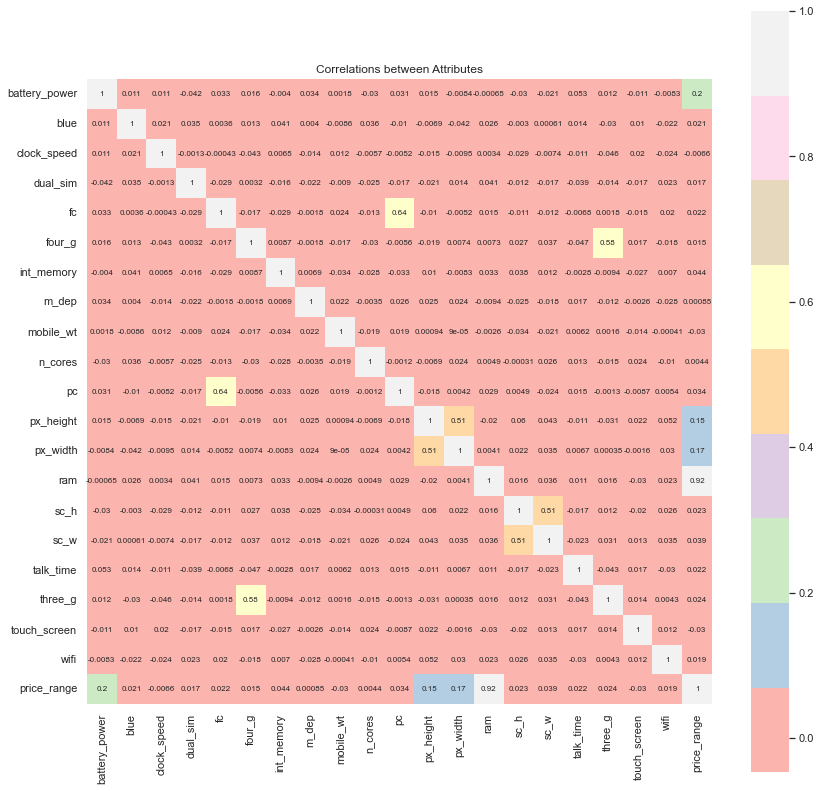

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots (figsize = (14, 14))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="Pastel1", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()
#heat map to show relationships between two variables, one plotted on each axis
#annot a way to associate arbitrary expressions to function arguments and return values.
#cmap=colourmaps jet Pastel1,Pastel2 GnBu
#annot_kws used to change  its fontsize

#### BAR GRAPH

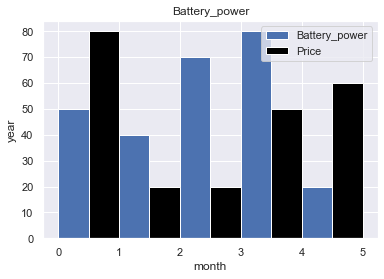

In [68]:
import pandas as pd
path="C:\\Users\\umash\\OneDrive\\Desktop\\mini project\\train.csv"
data=pd.read_csv(path)
df=pd.DataFrame(data)
#print(df)

from matplotlib import pyplot as plt

plt.bar([0.25,1.25,2.25,3.25,4.25],[50,40,70,80,20],
label="Battery_power",width=.5)
plt.bar([.75,1.75,2.75,3.75,4.75],[80,20,20,50,60],
label="Price",color='black',width=.5)
plt.legend()
plt.xlabel('month')
plt.ylabel('year')
plt.title('Battery_power')
plt.show()

#### How the battery mAh is spread

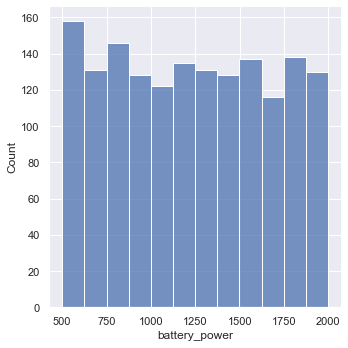

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=x_train["battery_power"])
plt.show()
#distribution plot variation in data distribution


####  Analyse the mobile depth(in cm)

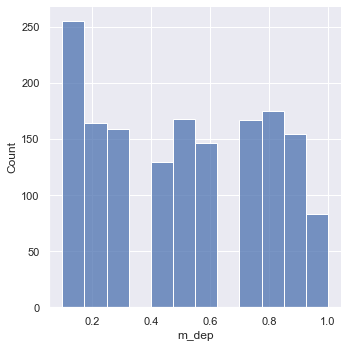

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=x_train["m_dep"])
plt.show()
#provides access to several approached for visualizing univariate(one variable at a time) 
#and bivariate(two variable) distribution of data.
#rc runtime configuration run Python,even before your code gets executed.

#### If there are any missing values or missing data.


In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    #print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_valid)
#fmt the max num of signifacnt digits
#s maximum number of characters
#E and f specifiers, the number of digits to print after the decimal point

KNN Classifier Accuracy Score:  0.9375


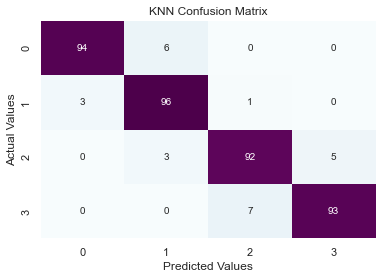

In [70]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

------------>Outlier Analysis of Non-Categorical Data<------------



<AxesSubplot:xlabel='talk_time'>

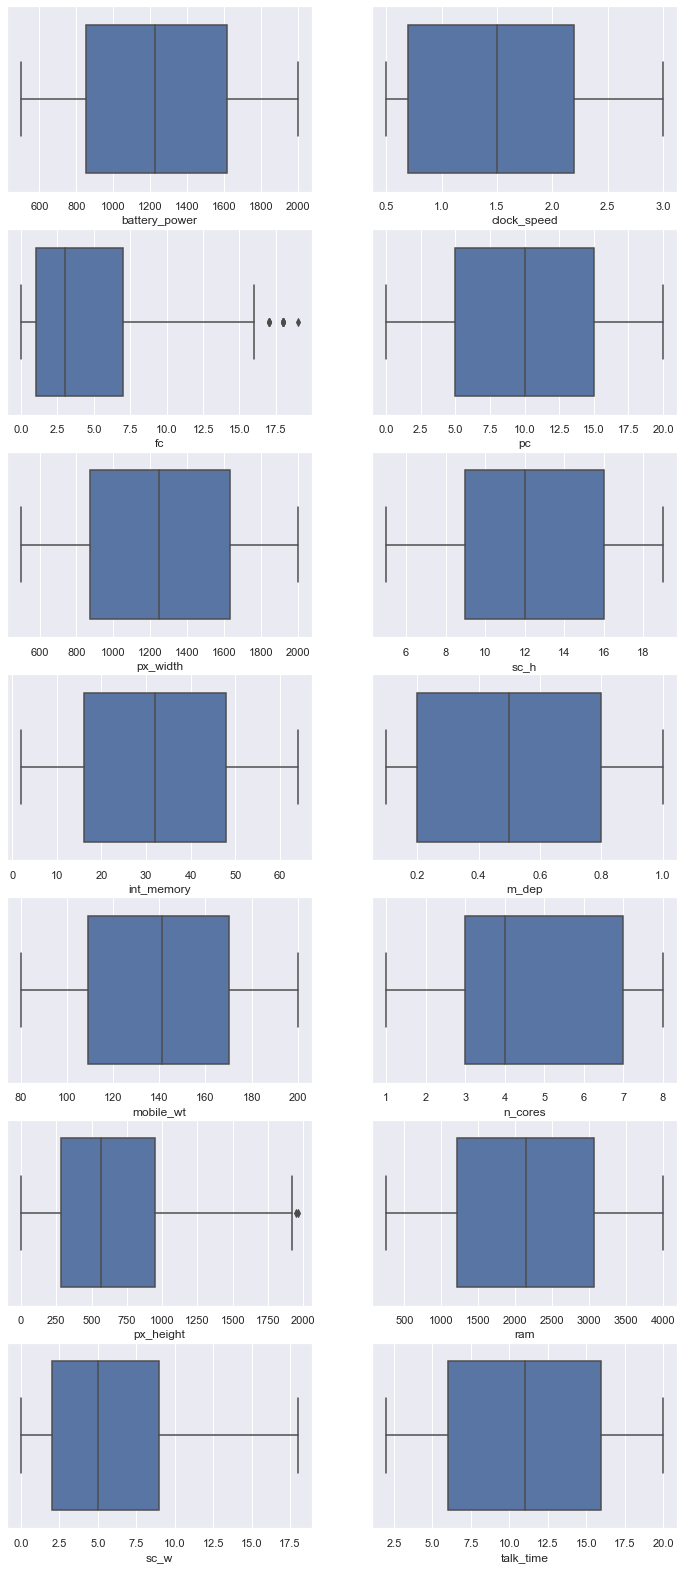

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=data['battery_power'],ax=ax[0,0])
sns.boxplot(x=data['clock_speed'],ax=ax[0,1])
sns.boxplot(x=data['fc'],ax=ax[1,0])
sns.boxplot(x=data['pc'],ax=ax[1,1])
sns.boxplot(x=data['px_width'],ax=ax[2,0])
sns.boxplot(x=data['sc_h'],ax=ax[2,1])
sns.boxplot(x=data['int_memory'],ax=ax[3,0])
sns.boxplot(x=data['m_dep'],ax=ax[3,1])
sns.boxplot(x=data['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=data['n_cores'],ax=ax[4,1])
sns.boxplot(x=data['px_height'],ax=ax[5,0])
sns.boxplot(x=data['ram'],ax=ax[5,1])
sns.boxplot(x=data['sc_w'],ax=ax[6,0])
sns.boxplot(x=data['talk_time'],ax=ax[6,1])
#outlier the values that fall more than three standard deviations from the mean
#outliers is used to find errors and for data visualization

#### Phones with 3G supported

In [39]:
labels = ["3G-supported",'Not supported']
values = x_train['three_g'].value_counts().values

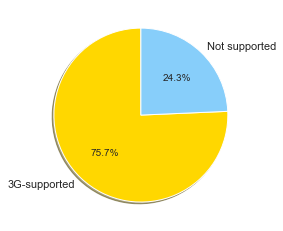

In [76]:
import matplotlib.pyplot as plt

labels = ["3G-supported",'Not supported']
values = x_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()
#subplot To divide the main plots into different plots

#### how many cellphones have front camera and primary camera

Text(0.5, 0, 'MegaPixels')

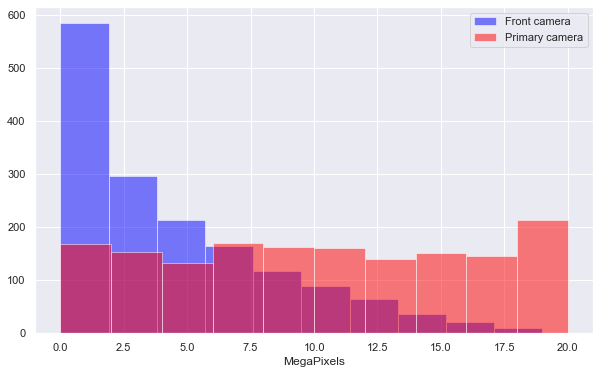

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
x_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
#subplot describe the layout of the figure
#alpha adjust the transparency of different curves/lines
#figsize changes only width of a plot 